In [17]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls = [
    {
        "city": "New York", 
        "growth_from_2000_to_2013": "4.8%", 
        "latitude": 40.7127837, 
        "longitude": -74.0059413, 
        "population": "8405837", 
        "rank": "1", 
        "state": "New York"
    }, 
    {
        "city": "Los Angeles", 
        "growth_from_2000_to_2013": "4.8%", 
        "latitude": 34.0522342, 
        "longitude": -118.2436849, 
        "population": "3884307", 
        "rank": "2", 
        "state": "California"
    }, 
    {
        "city": "Chicago", 
        "growth_from_2000_to_2013": "-6.1%", 
        "latitude": 41.8781136, 
        "longitude": -87.6297982, 
        "population": "2718782", 
        "rank": "3", 
        "state": "Illinois"
    }, 
    {
        "city": "Houston", 
        "growth_from_2000_to_2013": "11.0%", 
        "latitude": 29.7604267, 
        "longitude": -95.3698028, 
        "population": "2195914", 
        "rank": "4", 
        "state": "Texas"
    }, 
    {
        "city": "Philadelphia", 
        "growth_from_2000_to_2013": "2.6%", 
        "latitude": 39.9525839, 
        "longitude": -75.1652215, 
        "population": "1553165", 
        "rank": "5", 
        "state": "Pennsylvania"
    }, 
    {
        "city": "Phoenix", 
        "growth_from_2000_to_2013": "14.0%", 
        "latitude": 33.4483771, 
        "longitude": -112.0740373, 
        "population": "1513367", 
        "rank": "6", 
        "state": "Arizona"
    }, 
    {
        "city": "San Antonio", 
        "growth_from_2000_to_2013": "21.0%", 
        "latitude": 29.4241219, 
        "longitude": -98.49362819999999, 
        "population": "1409019", 
        "rank": "7", 
        "state": "Texas"
    }, 
    {
        "city": "San Diego", 
        "growth_from_2000_to_2013": "10.5%", 
        "latitude": 32.715738, 
        "longitude": -117.1610838, 
        "population": "1355896", 
        "rank": "8", 
        "state": "California"
    }, 
    {
        "city": "Dallas", 
        "growth_from_2000_to_2013": "5.6%", 
        "latitude": 32.7766642, 
        "longitude": -96.79698789999999, 
        "population": "1257676", 
        "rank": "9", 
        "state": "Texas"
    }, 
    {
        "city": "San Jose", 
        "growth_from_2000_to_2013": "10.5%", 
        "latitude": 37.3382082, 
        "longitude": -121.8863286, 
        "population": "998537", 
        "rank": "10", 
        "state": "California"
    }]

In [3]:
latitudes = []
longitudes = []
for items in ls:
#     print(items.keys())
#     print('/n'*3)
    x = items['latitude']
    y = items['longitude']
    latitudes.append(x)
    longitudes.append(y)

In [16]:
name = []
categories = []
postal_code = []
city = []
state = []
lat = []
lng = []

for latitude, longitude in zip(latitudes, longitudes):
    url = 'https://api.foursquare.com/v2/venues/search?client_id=K5NAWHG0L2X2YIXQ45TWMMUJT4AACY123DHOOFE5NALSU40R&client_secret=2MFCZE4LVDSYUELKZ2TW4HGNWRWIDKYTZ2SPZCK545I34AC2&v=20180323&ll={},{}&query=hospital'.format(latitude, longitude)
    text = requests.get(url).json()
    for hospital in text['response']['venues']:
        name.append(hospital['name'])
        if 'postalCode' in hospital['location']:
            postal_code.append(hospital['location']['postalCode'])
        else:
            postal_code.append('NaN')
        if 'city' in hospital['location']:
            city.append(hospital['location']['city'])
        else:
            city.append('NaN')
        state.append(hospital['location']['state'])
        lat.append(hospital['location']['lat'])
        lng.append(hospital['location']['lng'])
        

In [18]:
dic = {
    'name':name,
    'city':city,
    'state':state,
    'lat':lat,
    'lng':lng
}
df = pd.DataFrame(dic)

In [21]:
df.dropna(inplace=True)
df.head()

,name,city,state,lat,lng
0,NewYork-Presbyterian-Lower Manhattan Hospital,New York,NY,40.709917,-74.004758
1,NY Presbyterian Hospital Lower Manhattan Hosp ER,New York,NY,40.709985,-74.004720
2,Battery Park Veterinary Hospital,New York,NY,40.708163,-74.017927
3,Reade Street Animal Hospital,New York,NY,40.716732,-74.009979
4,Bellevue Hospital Center,New York,NY,40.739475,-73.975453


In [23]:
from sklearn.cluster import KMeans

scores = []
for k in range(2, 20):
  clf = KMeans(n_clusters=k)
  clf.fit(df[['lat', 'lng']])
  scores.append(clf.score(df[['lat', 'lng']]))



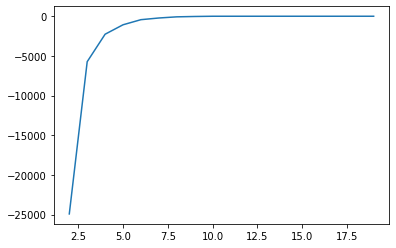

In [24]:
sns.lineplot(x=range(2,20), y=scores)

In [25]:
print('k=5 is the best choice')
clf = KMeans(n_clusters=5)
clf.fit(df[['lat', 'lng']])

k=5 is the best choice


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
clf.score(df[['lat', 'lng']])

-1077.6878437504547

In [28]:
clf.cluster_centers_

array([[  41.88746873,  -87.64317122],
       [  33.42560911, -115.81986613],
       [  30.66675466,  -96.89746999],
       [  40.33740726,  -74.57786132],
       [  37.32127427, -121.96045417]])

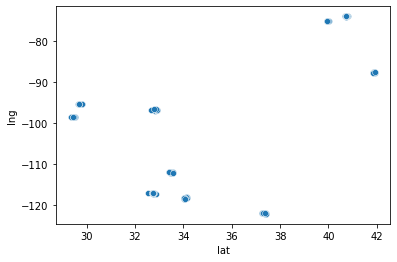

In [33]:
sns.scatterplot(x=df['lat'], y=df['lng'])

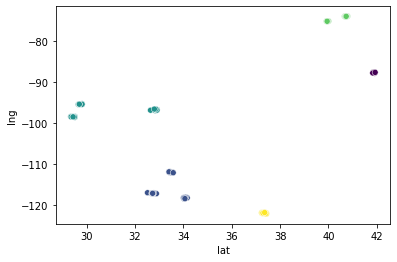

In [39]:
y_kmeans = clf.predict(df[['lat', 'lng']])
sns.scatterplot(x=df['lat'], y=df['lng'], c=y_kmeans, markers='*')

In [60]:
clusters = pd.DataFrame(y_kmeans)
clusters[0].unique()

array([3, 1, 0, 2, 4], dtype=int32)

In [61]:
print('{} has {} data hospitals'.format(1, (clusters[0]==0).sum()))
print('{} has {} data hospitals'.format(2, (clusters[0]==1).sum()))
print('{} has {} data hospitals'.format(3, (clusters[0]==2).sum()))
print('{} has {} data hospitals'.format(4, (clusters[0]==3).sum()))
print('{} has {} data hospitals'.format(5, (clusters[0]==4).sum()))

1 has 30 data hospitals
2 has 90 data hospitals
3 has 90 data hospitals
4 has 60 data hospitals
5 has 30 data hospitals


In [62]:
print('so the best place for a drugstore is within second or third cluster since they have the highest number of hospitals.')

so the best place for a drugstore is within second or third cluster since they have the highest number of hospitals.
